In [1]:
import yfinance as yf
import pandas as pd

In [2]:
pd.options.display.float_format = '{:.2f}'.format
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")
# sp500.to_csv("sp500.csv")

In [3]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.66,17.66,17.66,17.66,0,0.00,0.00
1928-01-03 00:00:00-05:00,17.76,17.76,17.76,17.76,0,0.00,0.00
1928-01-04 00:00:00-05:00,17.72,17.72,17.72,17.72,0,0.00,0.00
1928-01-05 00:00:00-05:00,17.55,17.55,17.55,17.55,0,0.00,0.00
1928-01-06 00:00:00-05:00,17.66,17.66,17.66,17.66,0,0.00,0.00
...,...,...,...,...,...,...,...
2024-03-04 00:00:00-05:00,5130.99,5149.67,5127.18,5130.95,4758440000,0.00,0.00
2024-03-05 00:00:00-05:00,5110.52,5114.54,5056.82,5078.65,4418410000,0.00,0.00
2024-03-06 00:00:00-05:00,5108.03,5127.97,5092.22,5104.76,4559050000,0.00,0.00


In [4]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-02-26 00:00:00-05:00', '2024-02-27 00:00:00-05:00',
               '2024-02-28 00:00:00-05:00', '2024-02-29 00:00:00-05:00',
               '2024-03-01 00:00:00-05:00', '2024-03-04 00:00:00-05:00',
               '2024-03-05 00:00:00-05:00', '2024-03-06 00:00:00-05:00',
               '2024-03-07 00:00:00-05:00', '2024-03-08 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24162, freq=None)

<Axes: xlabel='Date'>

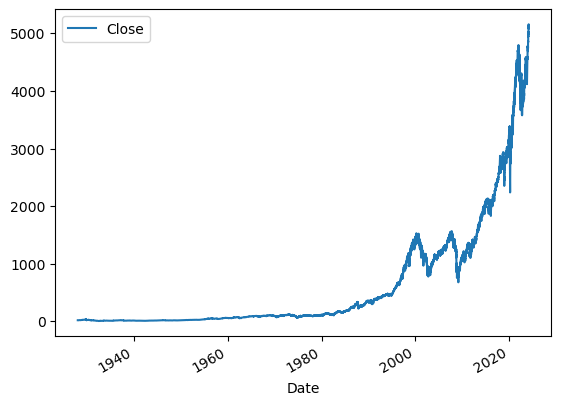

In [5]:
sp500.plot.line(y="Close", use_index = True)

In [6]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [7]:
sp500["Tomarrow"] = sp500["Close"].shift(-1)
sp500["EMA"] = sp500["Volume"].ewm(span=5, adjust=False).mean().astype(int)

In [8]:
sp500

,Open,High,Low,Close,Volume,Tomarrow,EMA
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.66,17.66,17.66,17.66,0,17.76,0
1928-01-03 00:00:00-05:00,17.76,17.76,17.76,17.76,0,17.72,0
1928-01-04 00:00:00-05:00,17.72,17.72,17.72,17.72,0,17.55,0
1928-01-05 00:00:00-05:00,17.55,17.55,17.55,17.55,0,17.66,0
1928-01-06 00:00:00-05:00,17.66,17.66,17.66,17.66,0,17.50,0
...,...,...,...,...,...,...,...
2024-03-04 00:00:00-05:00,5130.99,5149.67,5127.18,5130.95,4758440000,5078.65,4549207431
2024-03-05 00:00:00-05:00,5110.52,5114.54,5056.82,5078.65,4418410000,5104.76,4505608287
2024-03-06 00:00:00-05:00,5108.03,5127.97,5092.22,5104.76,4559050000,5157.36,4523422191


In [9]:
sp500["Target"] = (sp500["Close"]<sp500["Tomarrow"]).astype(int)

In [10]:
sp500

,Open,High,Low,Close,Volume,Tomarrow,EMA,Target
Date,,,,,,,,
1927-12-30 00:00:00-05:00,17.66,17.66,17.66,17.66,0,17.76,0,1
1928-01-03 00:00:00-05:00,17.76,17.76,17.76,17.76,0,17.72,0,0
1928-01-04 00:00:00-05:00,17.72,17.72,17.72,17.72,0,17.55,0,0
1928-01-05 00:00:00-05:00,17.55,17.55,17.55,17.55,0,17.66,0,1
1928-01-06 00:00:00-05:00,17.66,17.66,17.66,17.66,0,17.50,0,0
...,...,...,...,...,...,...,...,...
2024-03-04 00:00:00-05:00,5130.99,5149.67,5127.18,5130.95,4758440000,5078.65,4549207431,0
2024-03-05 00:00:00-05:00,5110.52,5114.54,5056.82,5078.65,4418410000,5104.76,4505608287,1
2024-03-06 00:00:00-05:00,5108.03,5127.97,5092.22,5104.76,4559050000,5157.36,4523422191,1


In [11]:
sp500=sp500.loc["1990-1-1":].copy()

In [12]:
sp500

,Open,High,Low,Close,Volume,Tomarrow,EMA,Target
Date,,,,,,,,
1990-01-02 00:00:00-05:00,353.40,359.69,351.98,359.69,162070000,358.76,145014622,0
1990-01-03 00:00:00-05:00,359.69,360.59,357.89,358.76,192330000,355.67,160786414,0
1990-01-04 00:00:00-05:00,358.76,358.76,352.89,355.67,177000000,352.20,166190943,0
1990-01-05 00:00:00-05:00,355.67,355.67,351.35,352.20,158530000,353.79,163637295,1
1990-01-08 00:00:00-05:00,352.20,354.24,350.54,353.79,140110000,349.62,155794863,0
...,...,...,...,...,...,...,...,...
2024-03-04 00:00:00-05:00,5130.99,5149.67,5127.18,5130.95,4758440000,5078.65,4549207431,0
2024-03-05 00:00:00-05:00,5110.52,5114.54,5056.82,5078.65,4418410000,5104.76,4505608287,1
2024-03-06 00:00:00-05:00,5108.03,5127.97,5092.22,5104.76,4559050000,5157.36,4523422191,1


In [13]:
import sklearn

from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [14]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

In [15]:
from sklearn.metrics import precision_score, accuracy_score
print("Precision: ", precision_score(test["Target"], preds))
print("Accuracy: ", accuracy_score(test["Target"], preds))

Precision:  0.52
Accuracy:  0.41


In [16]:
combined = pd.concat([test["Target"],preds],axis=1)

<Axes: xlabel='Date'>

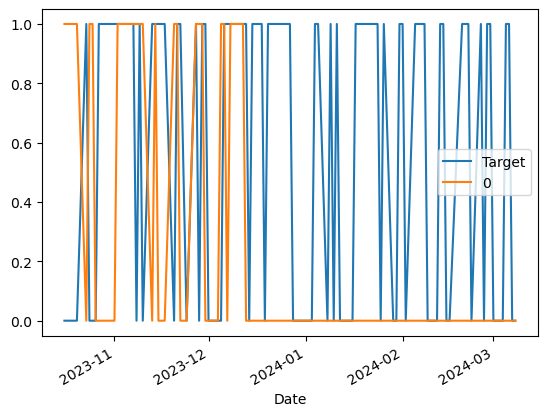

In [17]:
combined.plot()

In [18]:
feature_imp=pd.Series(model.feature_importances_).sort_values(ascending=False)
print(feature_imp[:10])

1   0.23
4   0.20
0   0.19
3   0.19
2   0.19
dtype: float64


In [19]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [20]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [21]:
predictions = backtest(sp500, model, predictors)

In [22]:
predictions["Predictions"].value_counts()

Predictions
0    3510
1    2602
Name: count, dtype: int64

In [23]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5292083013066872

In [24]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1   0.53
0   0.47
Name: count, dtype: float64

In [25]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
   
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [26]:
sp500=sp500.dropna()

In [27]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [28]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [29]:
predictions = backtest(sp500, model, new_predictors)

In [30]:
predictions["Predictions"].value_counts()

Predictions
0.00    4281
1.00     830
Name: count, dtype: int64

In [31]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5734939759036145

In [32]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1   0.54
0   0.46
Name: count, dtype: float64

In [33]:
feature_imp=pd.Series( model.feature_importances_).sort_index(ascending=True)
print(feature_imp[:15])

0   0.16
1   0.01
2   0.15
3   0.03
4   0.15
5   0.06
6   0.14
7   0.08
8   0.13
9   0.08
dtype: float64
